## Introdução 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_excel('Renda_Fuvest.xlsx')

In [4]:
df

,Mediana de Renda (em SM),Poli_Prod,Med_Pinheiros,FFLCH_LetrasMatutino
0,2021,8.03,7.75,5.59
1,2020,9.25,5.83,6.52
2,2019,12.50,8.21,6.33
3,2018,10.35,8.32,5.98
4,2017,14.41,10.34,6.23


In [5]:
df.describe()

,Mediana de Renda (em SM),Poli_Prod,Med_Pinheiros,FFLCH_LetrasMatutino
count,5.000000,5.000000,5.000000,5.000000
mean,2019.000000,10.908000,8.090000,6.130000
std,1.581139,2.556447,1.608804,0.359235
min,2017.000000,8.030000,5.830000,5.590000
25%,2018.000000,9.250000,7.750000,5.980000
50%,2019.000000,10.350000,8.210000,6.230000
75%,2020.000000,12.500000,8.320000,6.330000
max,2021.000000,14.410000,10.340000,6.520000


**Informações Importantes:**
1. Entre 2007 e 2016, a Fuvest oferecia bônus (Inclusp) a alunos de escola pública na nota final, que, entre 2014 e 2016, poderia resultar em um aumento de até 25% da nota final. 
2. A partir de 2017, foram adotadas políticas de ação afirmativa baseadas em cotas para alunos de escola pública, com duas subdivisões: EP, para alunos de escola pública independente de características fenotípicas; e PPI, exclusiva para alunos de escola pública pardos, pretos ou indígenas.
3. Em 2017, o percentual de contemplados era de 30% do total de aprovados na USP. A cada ano, esse percentual aumentou 5%, até chegar à meta preestabelecida de em 50%, em 2021.
4. No entanto, como há duas formas de ingresso na USP - Fuvest e ENEM - algumas faculdades sofreram alterações pouco significativas no corpo discente ingressante via Fuvest, dado que, sobretudo nas faculdades de humanas, optou-se por destinar a maior parcela das vagas reservadas a EP/PPI para o ingresso via ENEM, considerado um exame mais democrático que a Fuvest.

**Escopo do Projeto:** analisar, a partir de regressão linear, a variação da renda mediana (em salários mínimos) dos alunos ingressantes pela Fuvest ao longo do período em que houve alteração do percentual de cotas (2017-2021). Para tanto, foram analisados 3 cursos, um de cada área do conhecimento: Engenharia de Produção (EPUSP), Medicina (FM) e Letras Matutino (FFLCH)

## Fundamentos de Regressão Linear

A regressão linear é obtida através de um processo relativamente simples:
1. Definir a variável dependente Y (no caso, a renda mediana de cada curso) e a variável independente X (no caso, o ano da Fuvest)
2. Correlacionar essas duas variáveis a partir de uma equação linear: Y = α + (β * X)
3. Estimar os valores dos coeficientes α e β a partir das fórmulas abaixo:

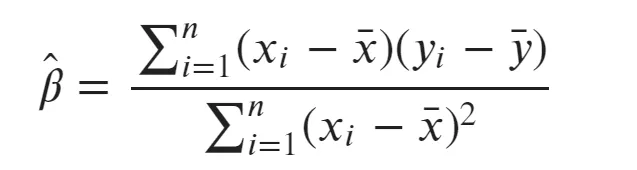

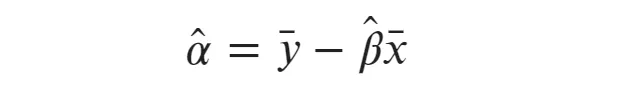

Encontrados os coeficientes, basta plotar a equação no gráfico de dispersão e teremos nossa regressão linear. Além disso, podemos obter métricas importantes para verificar o quão bom é o ajuste da reta a nossos dados, como o R^2, cuja escala varia de 0 a 1 - sendo 0 nenhuma correlação linear e 1 correlação linear total. Para obter esta métrica, precisamos da soma de quadrados residual (RSS ou SQR) e a soma de quadrados total (TSS ou SQT) 

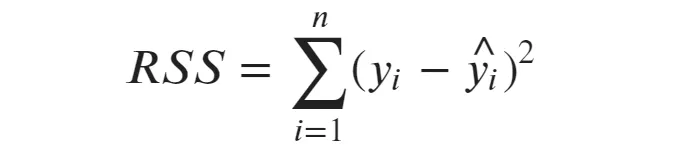

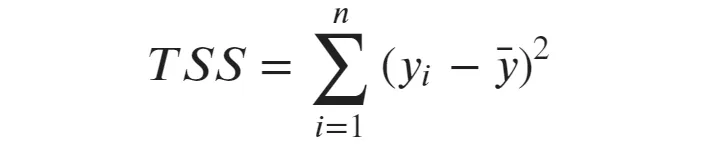

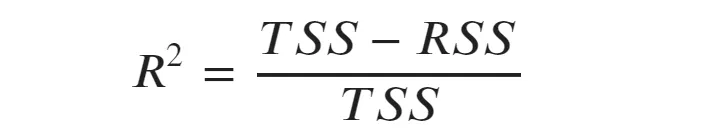

## Funções

In [6]:
df_poli = df[['Mediana de Renda (em SM)',"Poli_Prod"]]
df_med = df[['Mediana de Renda (em SM)',"Med_Pinheiros"]]
df_letras = df[['Mediana de Renda (em SM)',"FFLCH_LetrasMatutino"]]

In [7]:
def beta(df):
    num_1 = 0
    num_2 = 0
    num = 0
    denom = 0
    x_media = np.mean(df.iloc[:,0])
    y_media = np.mean(df.iloc[:,1])
    for i in range(0,5):
        num_1 = df.iloc[i,0] - x_media
        num_2 = df.iloc[i,1] - y_media
        num = num + num_1*num_2
        denom = denom + num_1*num_1
    beta = num/denom
    return beta

In [8]:
def alfa(df,beta):
    x_media = np.mean(df.iloc[:,0])
    y_media = np.mean(df.iloc[:,1])
    alfa = y_media - beta*x_media
    return alfa

In [9]:
def r2(df, alfa, beta):
    RSS = 0
    TSS = 0
    x_media = np.mean(df.iloc[:,0])
    y_media = np.mean(df.iloc[:,1])
    for i in range(0,5):
        y_esp = beta*df.iloc[i, 0] + alfa
        RSS = RSS + (df.iloc[i, 1] - y_esp)**2
        TSS = TSS + (df.iloc[i, 1] - y_media)**2
    r2 = (TSS - RSS)/TSS
    return r2

## Engenharia de Produção

In [10]:
#Equação Linear
beta_poli = beta(df_poli)
alfa_poli = alfa(df_poli, beta_poli)
print("Y = ",beta_poli.round(2),"X","+", alfa_poli.round(2))

Y =  -1.39 X + 2809.24


In [11]:
#Coeficiente de Determinação
r2_poli = r2(df_poli, alfa_poli, beta_poli)
print("O coeficiente de determinação é de:", r2_poli.round(3))

O coeficiente de determinação é de: 0.735


**Conclusão:** foi possível perceber que a reta de regressão se ajusta bem aos dados obtidos, o que pode ser comprovado por um valor de coeficiente de determinação relativamente alto. Portanto, podemos concluir que, no curso de Engenharia de Produção, a política de cotas adotada pela Universidade de São Paulo contribuiu para progressiva diminuição da renda mediana e, portanto, pluralizou/democratizou o acesso ao curso

## Medicina

In [12]:
#Equação Linear
beta_med = beta(df_med)
alfa_med = alfa(df_med, beta_med)
print("Y = ",beta_med.round(2),"X","+", alfa_med.round(2))

Y =  -0.77 X + 1556.66


In [13]:
#Coeficiente de Determinação
r2_med = r2(df_med, alfa_med, beta_med)
print("O coeficiente de determinação é de:", r2_med.round(3))

O coeficiente de determinação é de: 0.568


**Conclusão:** os mesmos efeitos percebidos em Engenharia de Produção também foram observados em Medicina, ainda que de forma mais sutil, com um coeficiente de determinação um pouco menor. Mesmo assim, é notável progressiva redução da renda mediana dos alunos do mais concorrido curso da USP.

## Letras (Matutino)

In [14]:
#Equação Linear
beta_letras = beta(df_letras)
alfa_letras = alfa(df_letras, beta_letras)
print("Y = ",beta_letras.round(2),"X","+", alfa_letras.round(2))

Y =  -0.07 X + 155.54


In [15]:
#Coeficiente de Determinação
r2_letras = r2(df_letras, alfa_letras, beta_letras)
print("O coeficiente de determinação é de:", r2_letras.round(3))

O coeficiente de determinação é de: 0.106


**Conclusão:** como o coeficiente de determinação é muito baixo, é possível dizer que, em Letras, o perfil do corpo discente ingressante pela Fuvest não sofreu grandes alterações. No entanto, é importante lembrar que a maioria das vagas reservadas a EP e PPI do curso são disponibilizadas a partir do ingresso via ENEM, logo o percentual de vagas AC via Fuvest não sofreu alterações significativas no período, contribuindo para manutenção do patamar socioeconômico.

## Visualização dos Dados

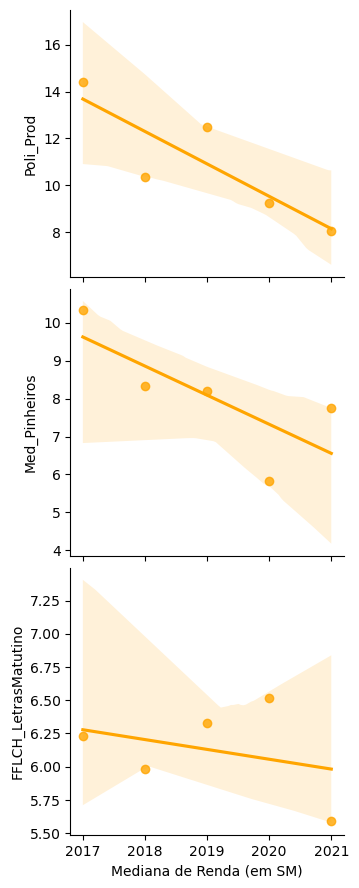

In [16]:
sns.pairplot(df, x_vars=["Mediana de Renda (em SM)"], y_vars=["Poli_Prod","Med_Pinheiros","FFLCH_LetrasMatutino"], plot_kws={'color':'orange'}, height=3, aspect=1.2, kind="reg");